In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [6]:
# Load dataset
df = pd.read_csv("Ice Cream.csv")

# Show first few rows
df.head()


,Temperature,Revenue
0,24.6,535
1,26.1,626
2,27.8,661
3,20.6,488
4,11.6,317


In [7]:
# Summary statistics
print(df.describe())

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())


       Temperature      Revenue
count   500.000000   500.000000
mean     22.281600   522.058000
std       8.097597   175.410399
min       0.000000    10.000000
25%      17.175000   406.000000
50%      22.400000   530.000000
75%      27.800000   643.000000
max      45.000000  1000.000000

Missing values:
 Temperature    0
Revenue        0
dtype: int64


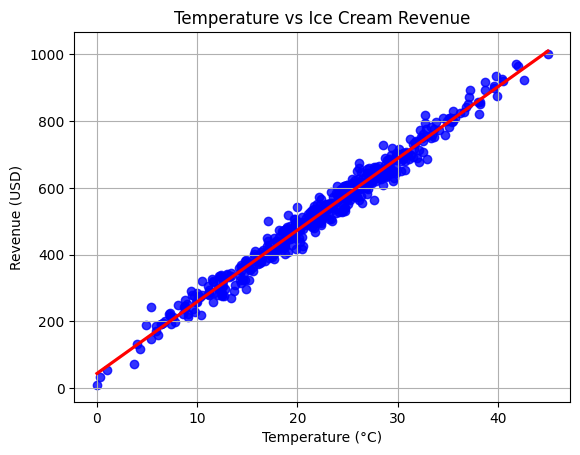

In [8]:
# Scatter plot with trendline
sns.regplot(x='Temperature', y='Revenue', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title("Temperature vs Ice Cream Revenue")
plt.xlabel("Temperature (°C)")
plt.ylabel("Revenue (USD)")
plt.grid(True)
plt.show()


In [10]:
# Features and Target
X = df[['Temperature']]
y = df['Revenue']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

# Decision Tree Regressor
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
tree_preds = tree.predict(X_test)


In [11]:
def evaluate_model(name, y_true, y_pred):
    print(f"{name} Performance:")
    print("R² Score:", r2_score(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print()

# Evaluate both models
evaluate_model("Linear Regression", y_test, lr_preds)
evaluate_model("Decision Tree Regressor", y_test, tree_preds)


Linear Regression Performance:
R² Score: 0.9771509516333023
RMSE: 25.543958747446354
MAE: 19.195652579103704

Decision Tree Regressor Performance:
R² Score: 0.9610629297649239
RMSE: 33.3453884451142
MAE: 25.85583333333333

